<a href="https://colab.research.google.com/github/Sartxy/MyProject/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UCI Machine Learning Dataset (Portfolio Project 🙏🙏)



---



### SETUP 🛠🛠


> This setup is a solution to import the dataset from UCI Machine Learning Repository by using ```from ucimlrepo import fetch_ucirepo``` and import useful modules for this project, let's start it. 😀😀


> link for datasets:
https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset





In [1]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

datasets = fetch_ucirepo(id=468)
print(datasets.variables)

                       name     role         type demographic description  \
0            Administrative  Feature      Integer        None        None   
1   Administrative_Duration  Feature      Integer        None        None   
2             Informational  Feature      Integer        None        None   
3    Informational_Duration  Feature      Integer        None        None   
4            ProductRelated  Feature      Integer        None        None   
5   ProductRelated_Duration  Feature   Continuous        None        None   
6               BounceRates  Feature   Continuous        None        None   
7                 ExitRates  Feature   Continuous        None        None   
8                PageValues  Feature      Integer        None        None   
9                SpecialDay  Feature      Integer        None        None   
10                    Month  Feature  Categorical        None        None   
11         OperatingSystems  Feature      Integer        None        None   

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats, ttest_ind, f_oneway, chi2_contingency
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split



---



In [3]:
X = datasets.data.features
y = datasets.data.targets
df = pd.concat([X,y],axis=1)
display(df)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False




---



### Data Manipulaion & Exploration

> In this section, i need to investigate the data with many types of analysis such as univariate, bivariate and multivariate. To find an insight of the data and use to solve business problem in the next step.  



#### Univariate Analysis

In [4]:
X.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN


In [5]:
print(X.isnull().sum())
print(y.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64
Revenue    0
dtype: int64


In [6]:
cat_var = pd.concat([X.select_dtypes('object'),y],axis=1)
num_var = X.select_dtypes('number')

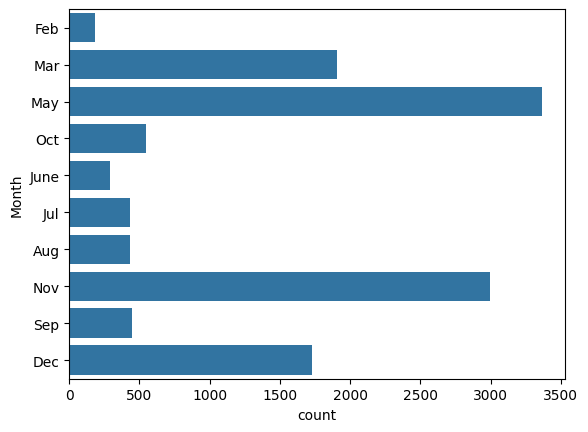

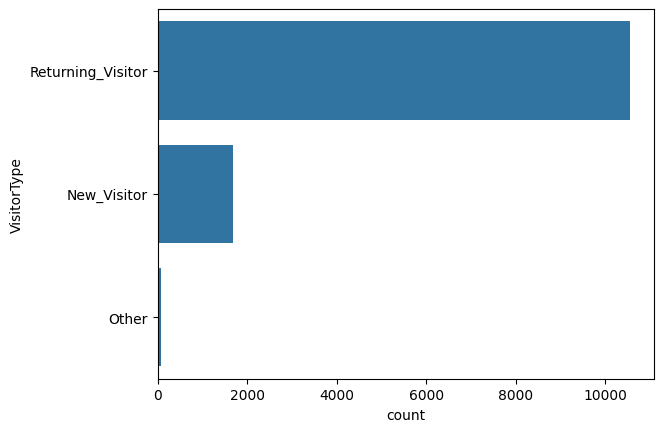

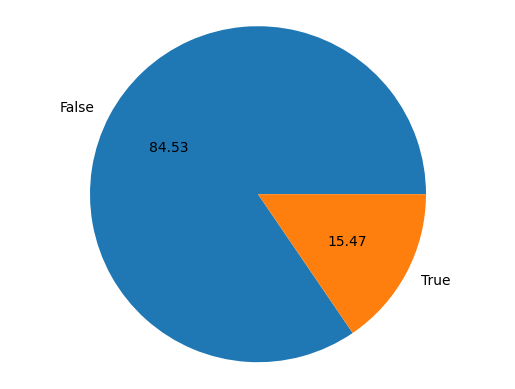

<Figure size 640x480 with 0 Axes>

In [7]:
# cat_var
for col in cat_var.columns[:-1]:
  sns.countplot(cat_var[col])
  plt.show()
  plt.clf()
cat_var.groupby('Revenue').size().plot(kind='pie',autopct='%.2f')
plt.axis('equal')
plt.show()
plt.clf()

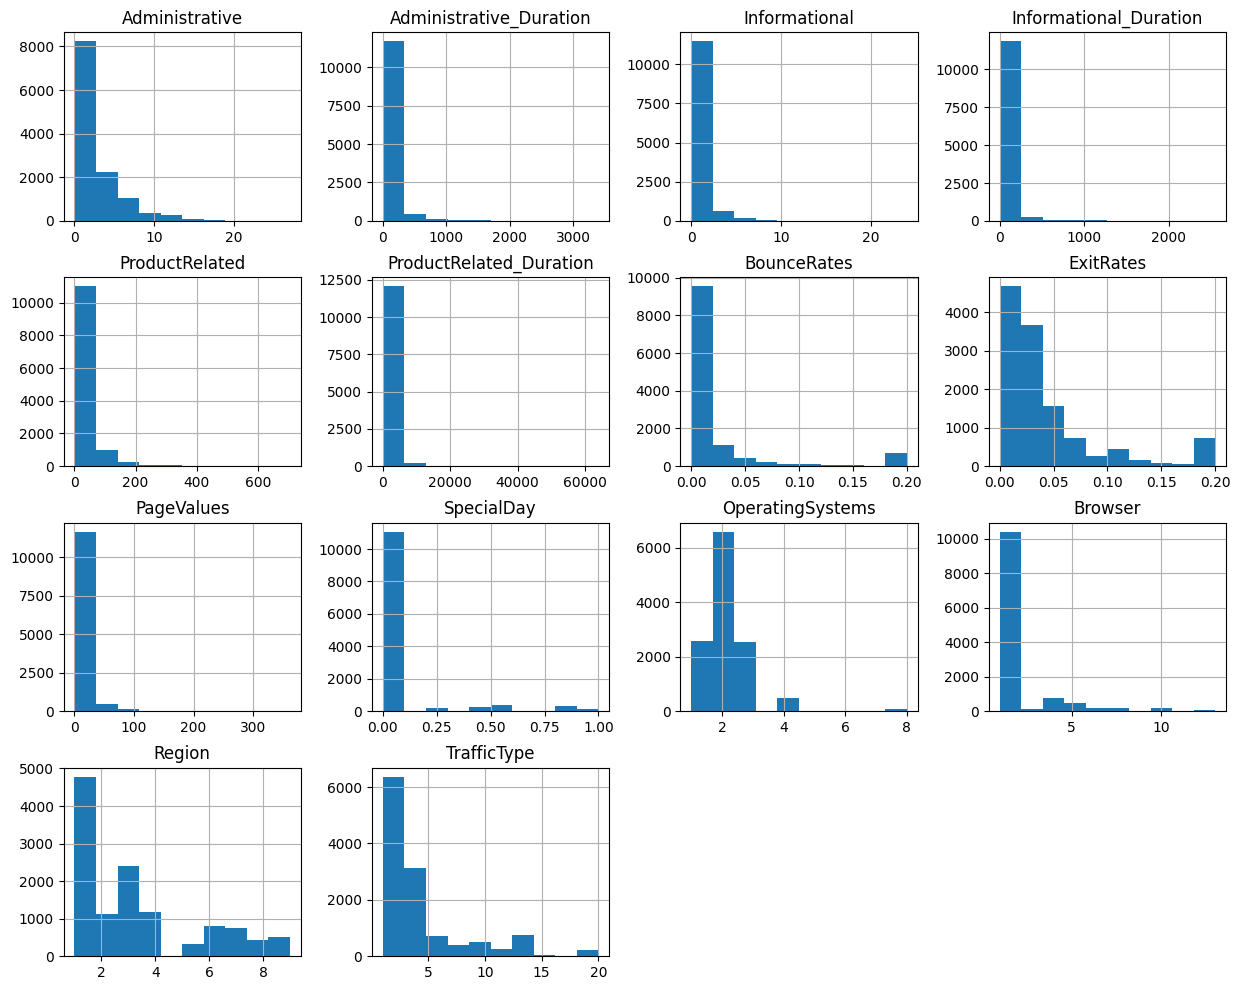

In [8]:
# num_var
num_var.hist(figsize=(15,12))
plt.show()

#### Bivariate Analysis

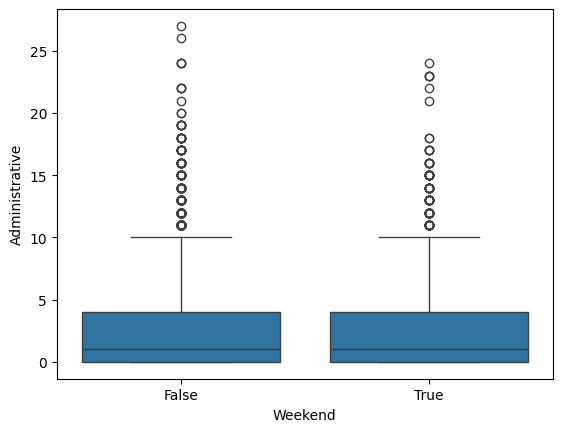

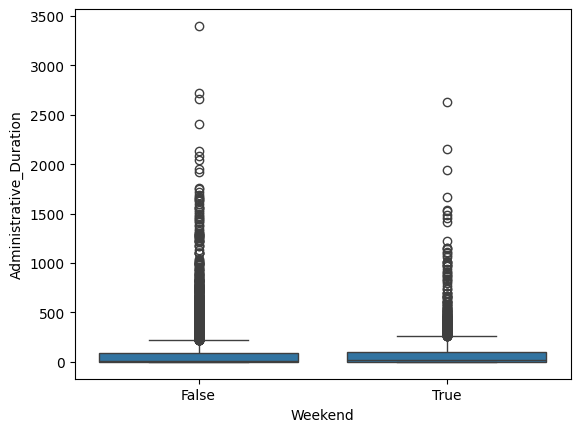

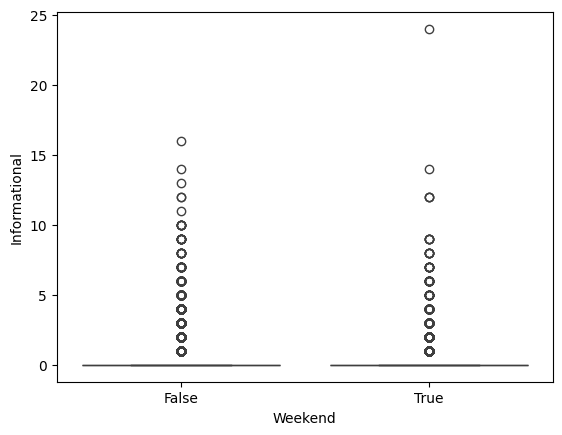

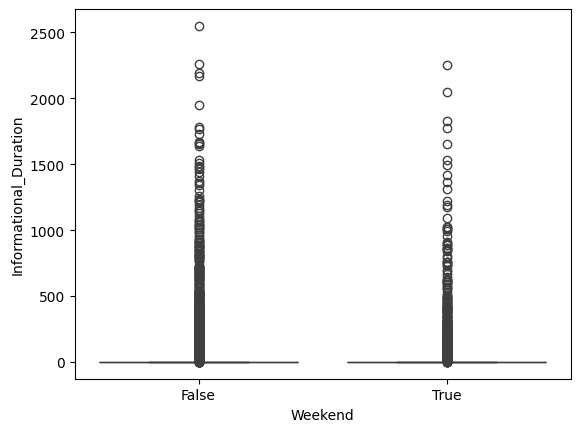

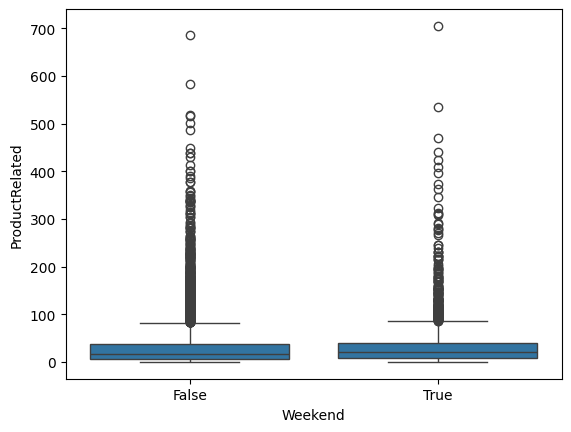

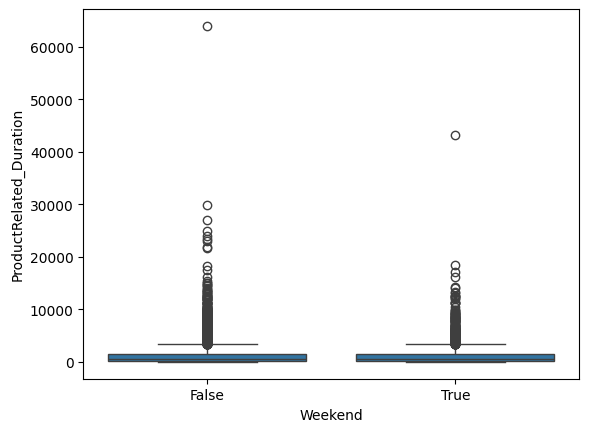

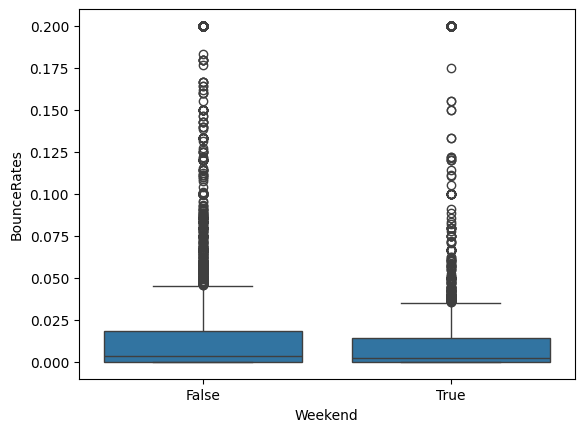

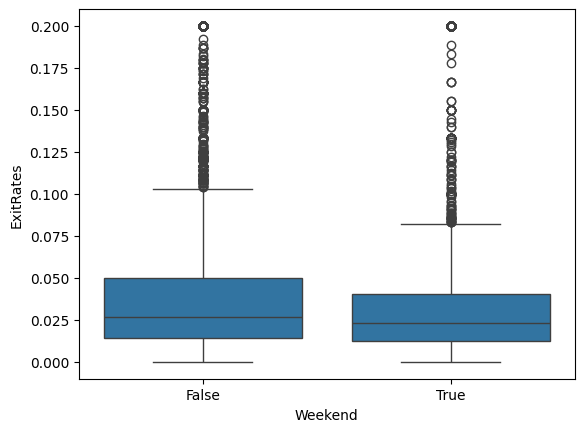

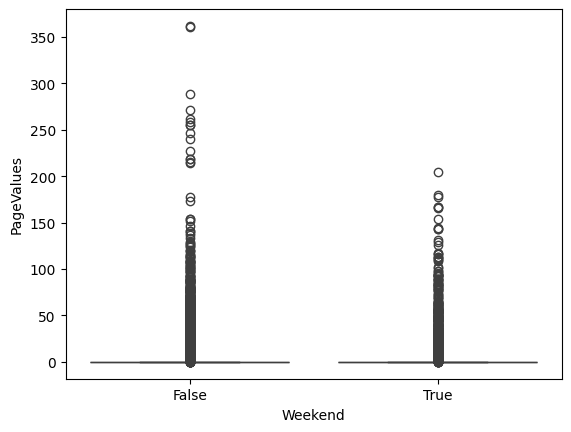

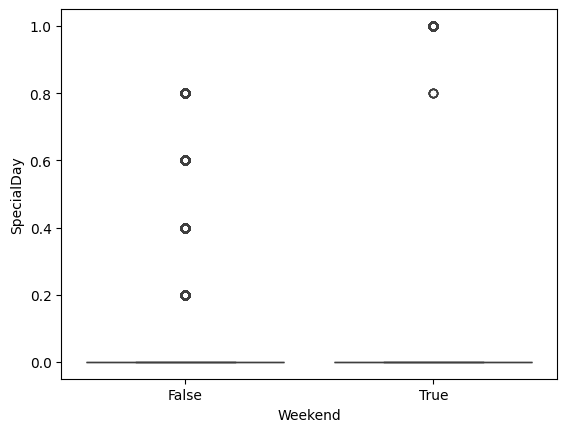

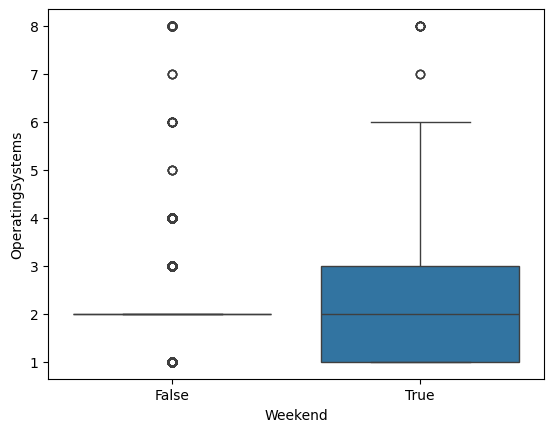

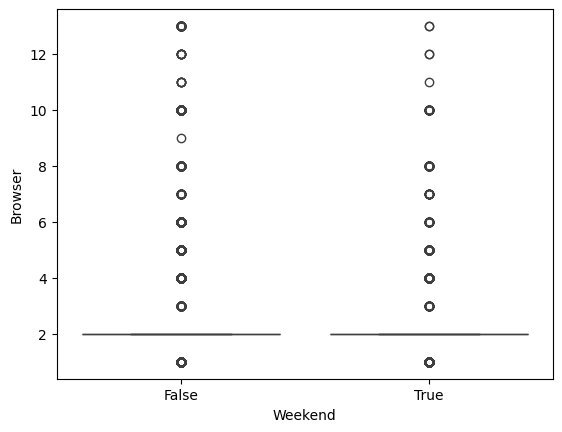

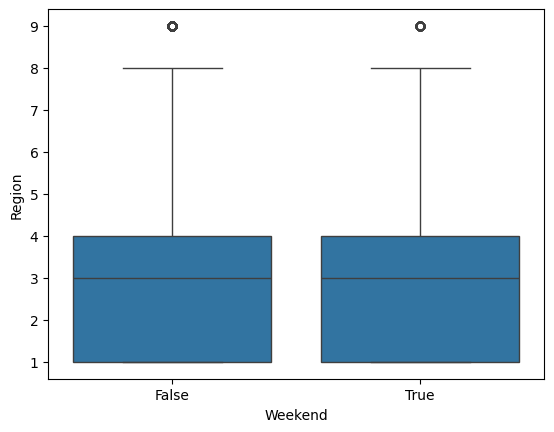

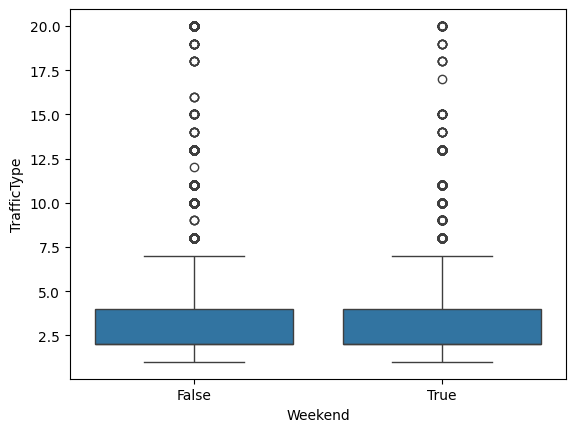

<Figure size 640x480 with 0 Axes>

In [9]:
## Boxplot between weekend and num_var
for col in num_var.columns:
  sns.boxplot(y=col,x='Weekend',data=df)
  plt.show()
  plt.clf()

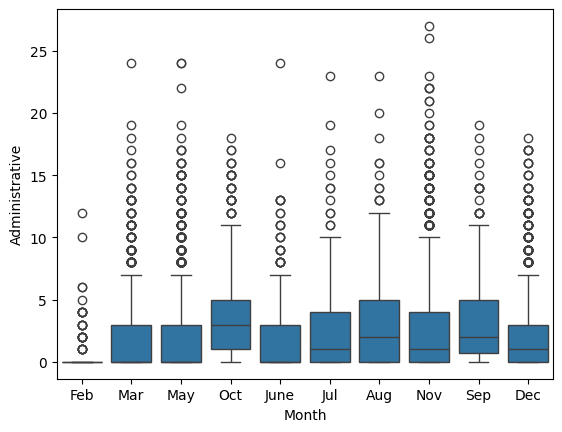

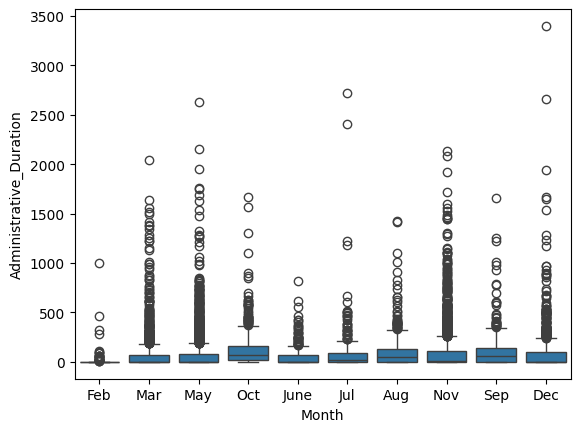

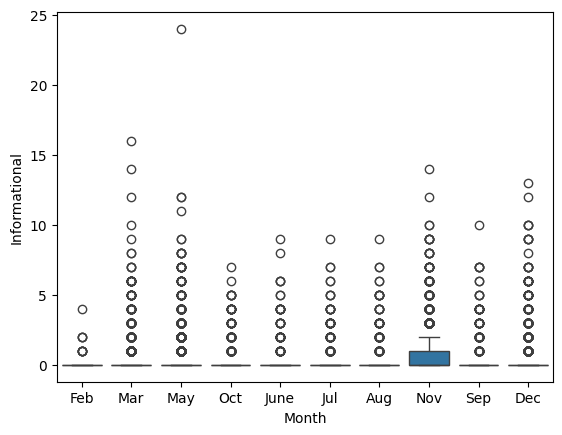

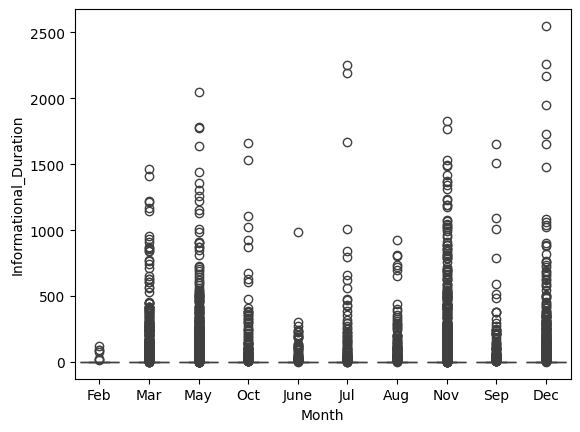

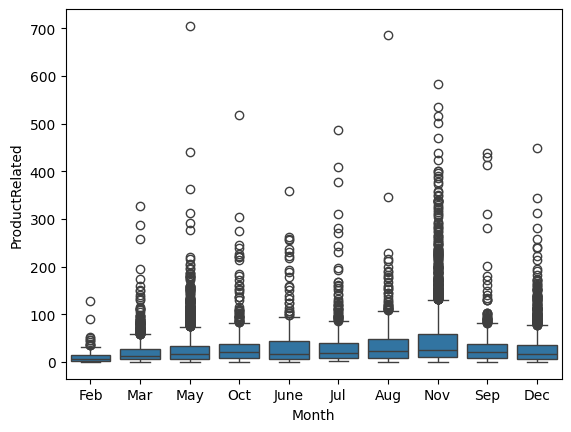

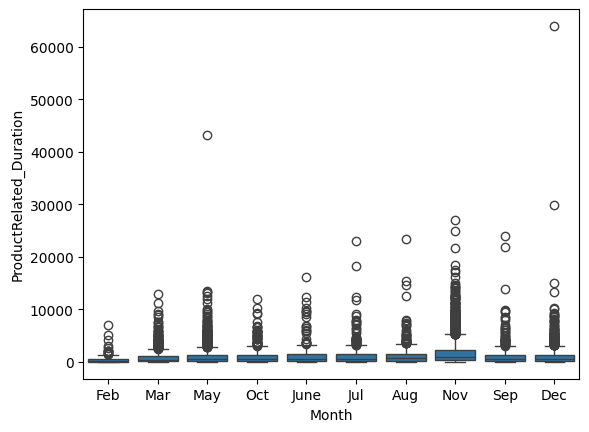

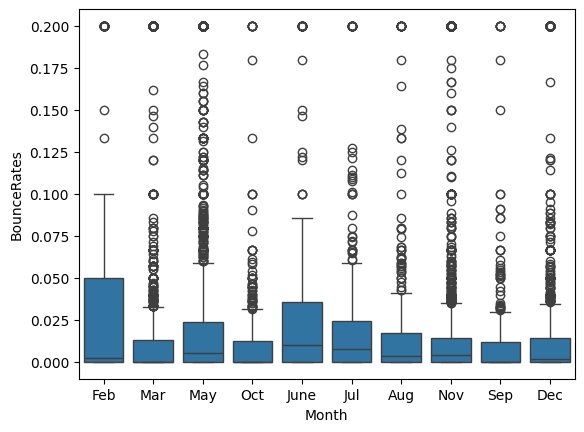

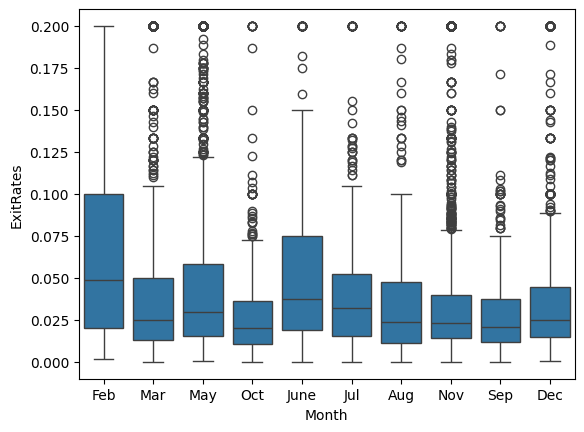

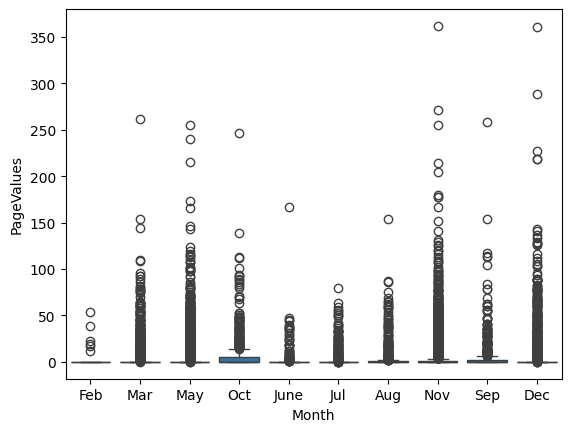

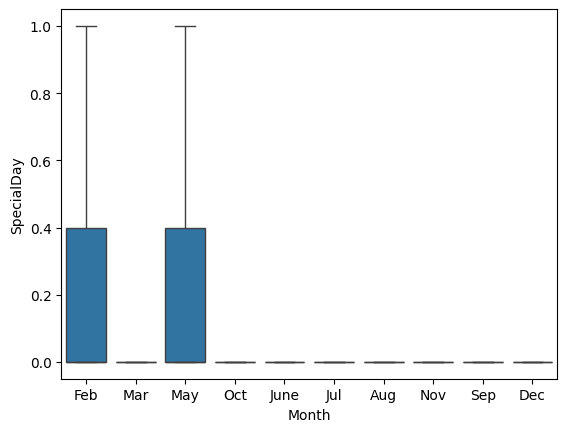

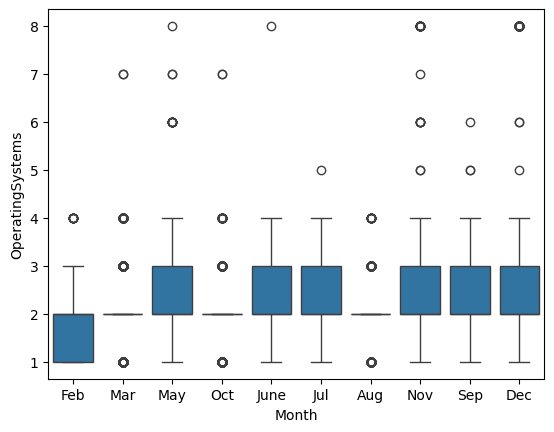

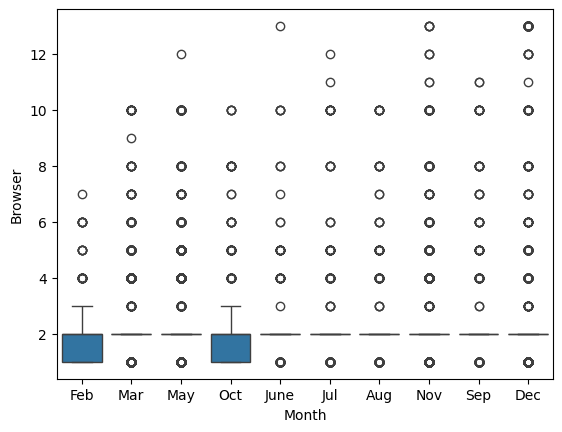

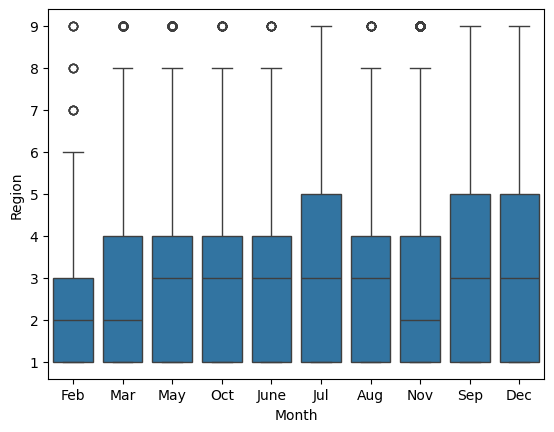

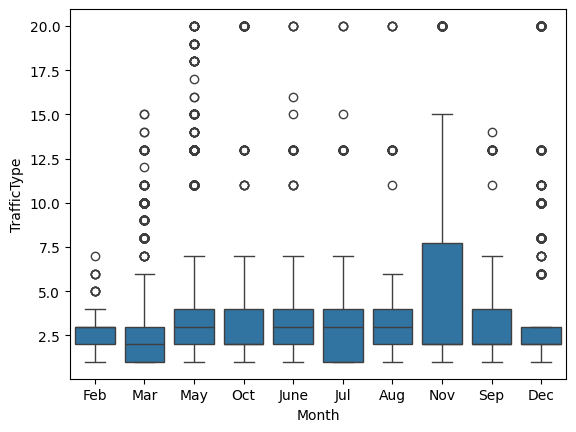

<Figure size 640x480 with 0 Axes>

In [10]:
## Boxplot between Month and num_var
for col in num_var.columns:
  sns.boxplot(y=col,x='Month',data=df)
  plt.show()
  plt.clf()

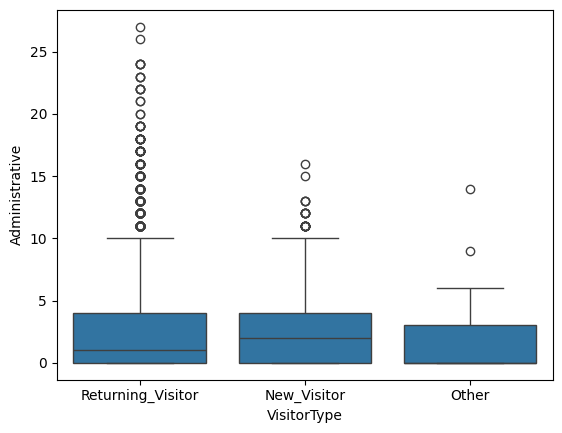

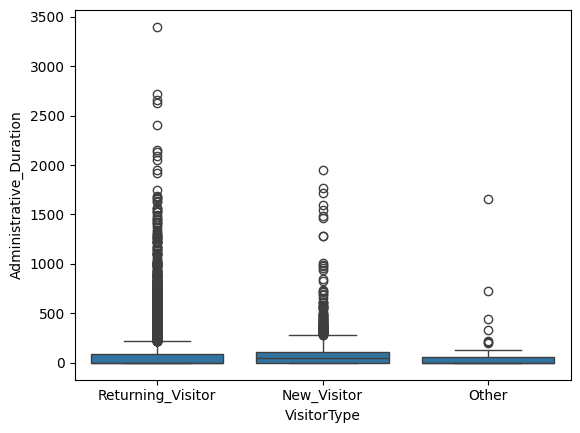

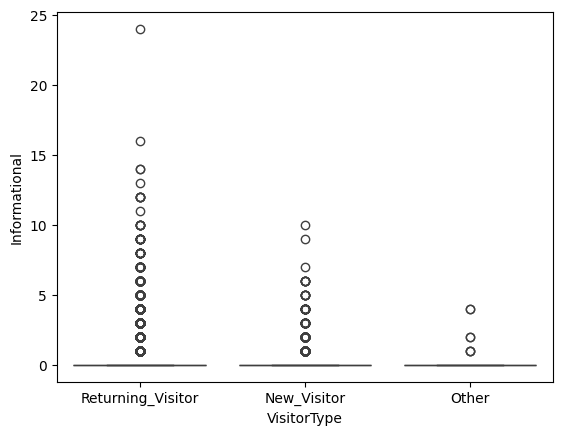

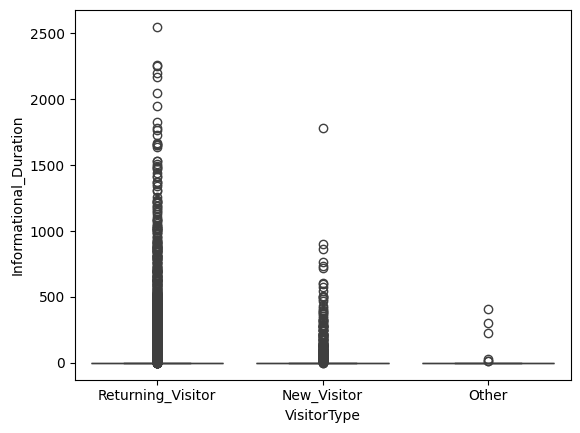

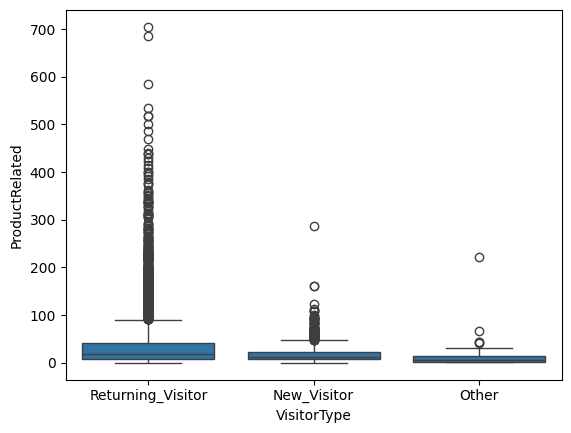

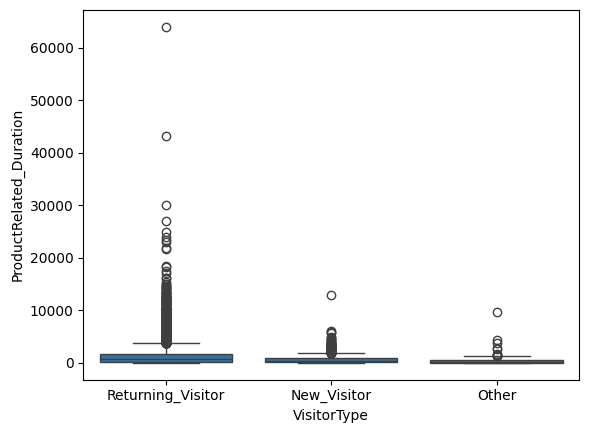

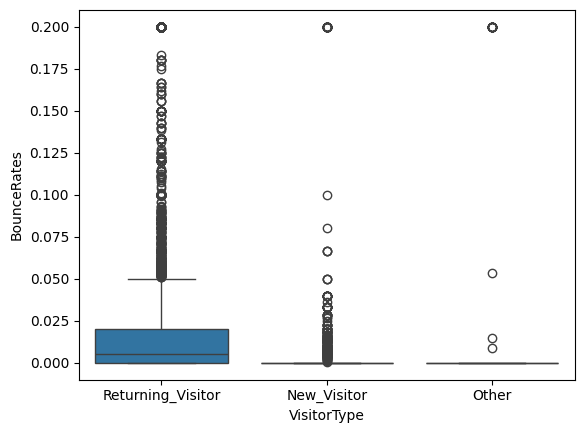

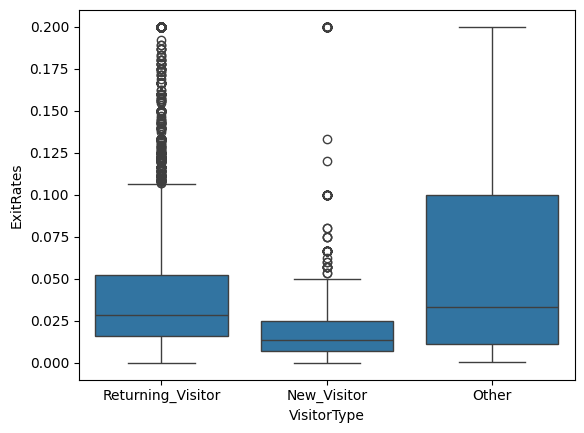

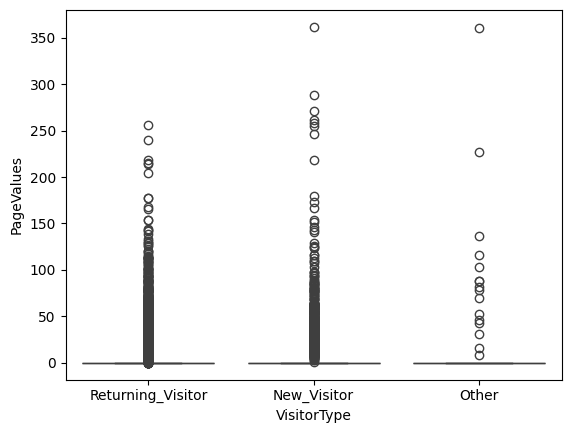

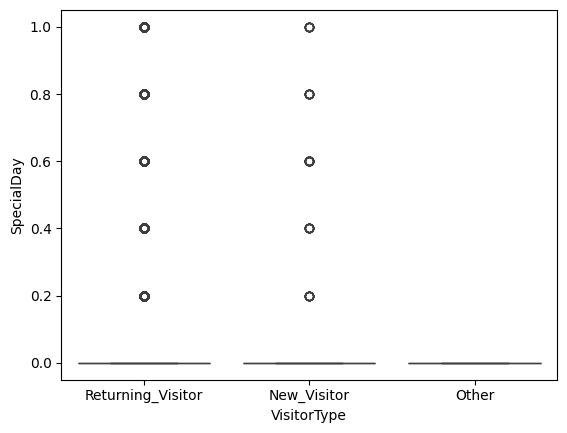

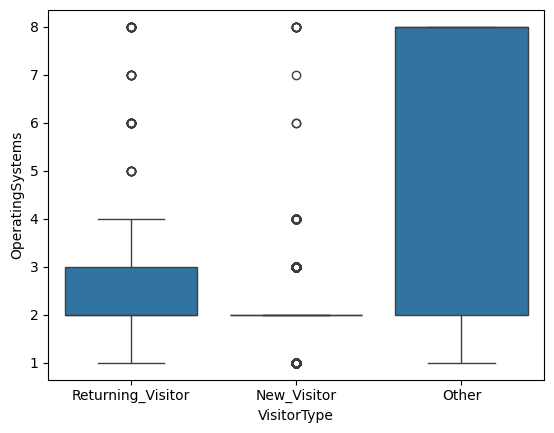

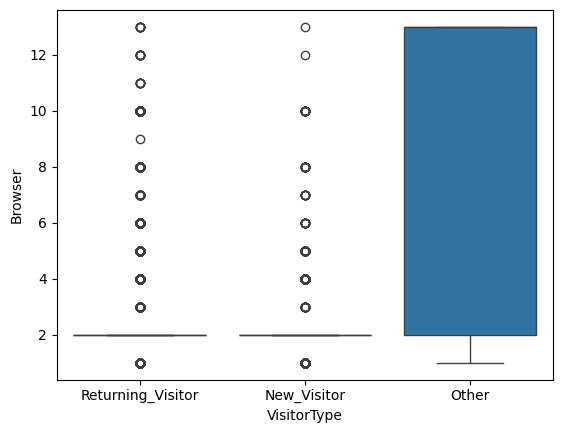

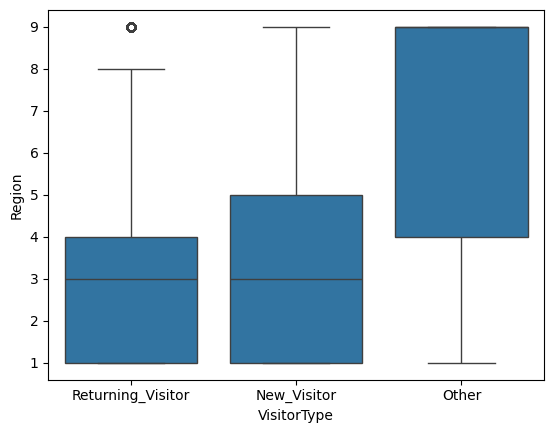

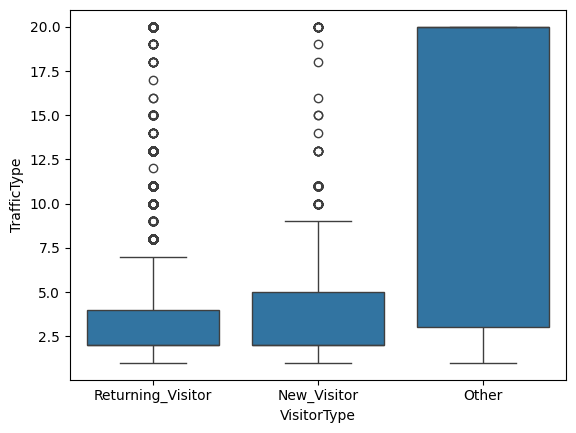

<Figure size 640x480 with 0 Axes>

In [11]:
## Boxplot between VisitorType and num_var
for col in num_var.columns:
  sns.boxplot(y=col,x='VisitorType',data=df)
  plt.show()
  plt.clf()

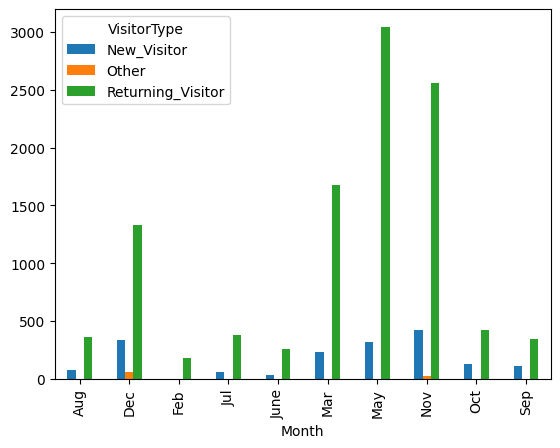

<Figure size 640x480 with 0 Axes>

In [12]:
df.groupby(['Month','VisitorType']).size().unstack().plot(kind='bar',stacked=False)
plt.show()
plt.clf()

In [13]:
## Cross Tabulation
xtab_1 = pd.crosstab(df['Month'],df['Revenue'])
xtab_2 = pd.crosstab(df['VisitorType'],df['Revenue'])
xtab_3 = pd.crosstab(df['Weekend'],df['Revenue'])
print(xtab_1)
print(xtab_2)
print(xtab_3)

Revenue  False  True 
Month                
Aug        357     76
Dec       1511    216
Feb        181      3
Jul        366     66
June       259     29
Mar       1715    192
May       2999    365
Nov       2238    760
Oct        434    115
Sep        362     86
Revenue            False  True 
VisitorType                    
New_Visitor         1272    422
Other                 69     16
Returning_Visitor   9081   1470
Revenue  False  True 
Weekend              
False     8053   1409
True      2369    499


#### Multivariate Analysis

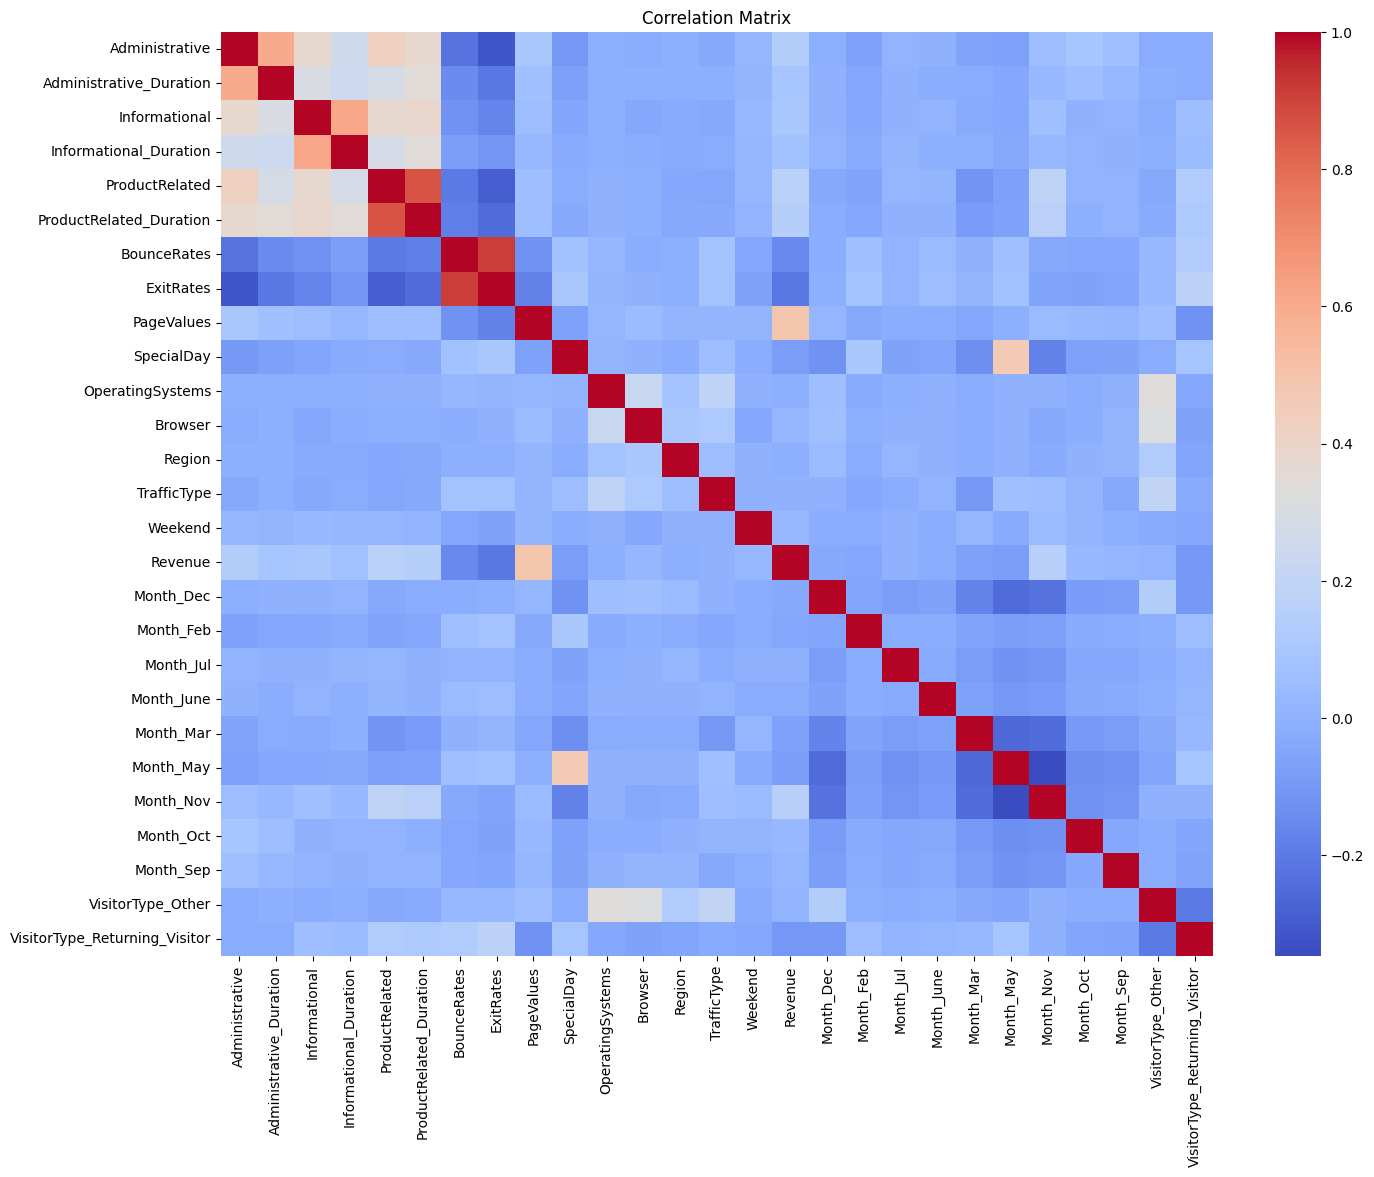

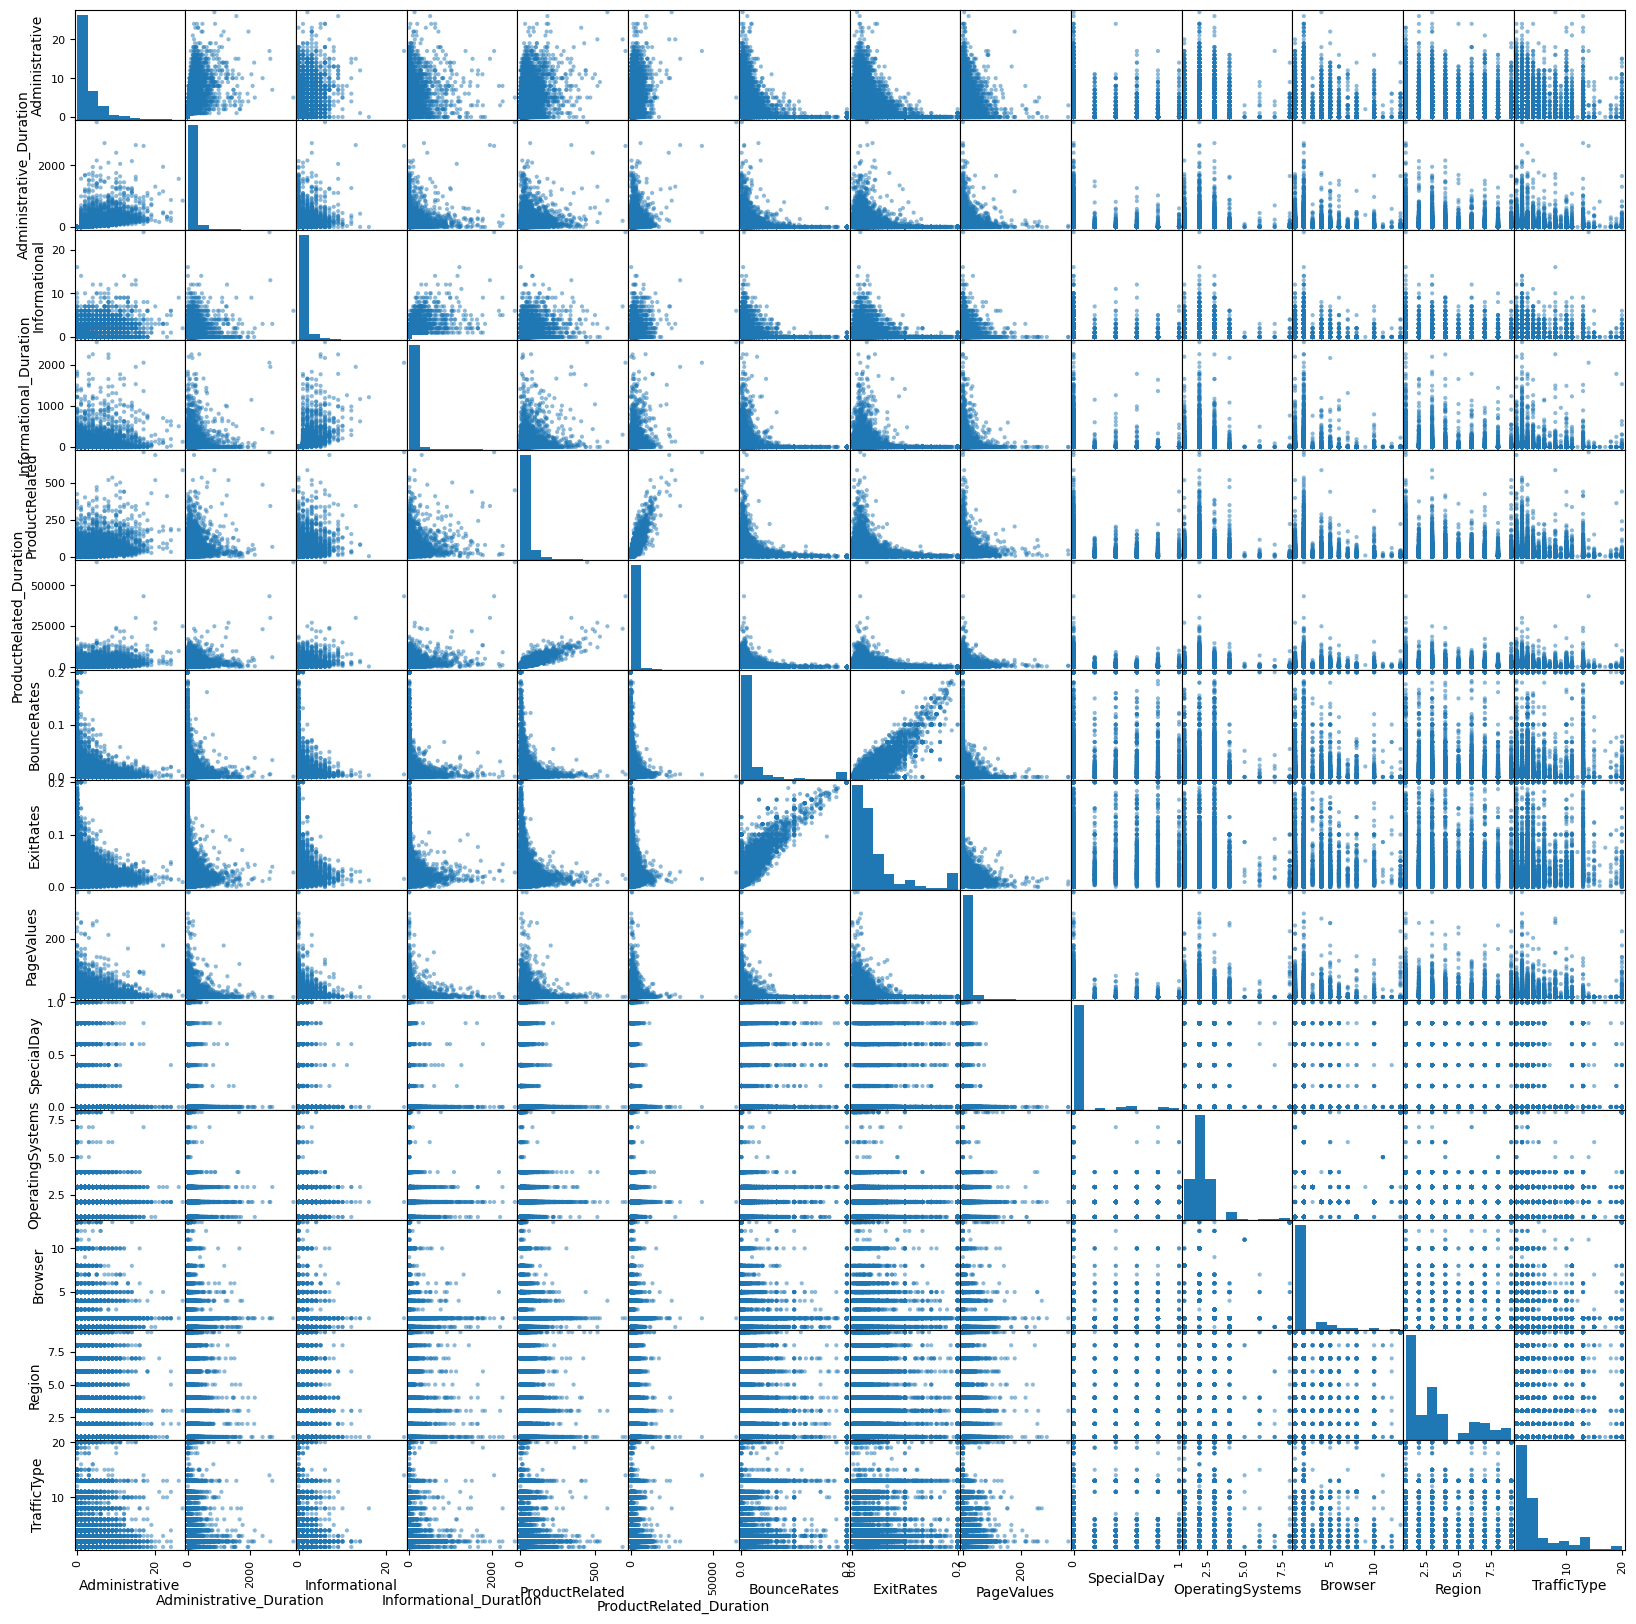

<Figure size 640x480 with 0 Axes>

In [14]:
df_ = df.copy()
df_ = pd.get_dummies(df_,drop_first=True)
corr_matrix = df_.corr()

# Visualize the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter matrix plot
df_for_scatter = df_.select_dtypes(exclude='bool')
pd.plotting.scatter_matrix(df_for_scatter, figsize=(20, 20))
plt.show()
plt.clf()



---



#### Inferential Analysis



> In this step, i want to use statistical method to solve that the variables are significantly associated by using several test such as t-test, F-test, Chi-squared Test or z-test. ❓❓



In [17]:
# Chi-Squared test for 2 category variables
chi2_month = chi2_contingency(xtab_1)
chi2_visitor = chi2_contingency(xtab_2)
chi2_weekend = chi2_contingency(xtab_3)
print(chi2_month[1])
print(chi2_visitor[1])
print(chi2_weekend[1])

2.2387855164805443e-77
4.269904152293867e-30
0.0012663251061221968
